<img src="involys.png" alt="Drawing" style="width: 500px;"/>

# <div style="text-align:center"> PFE : Module de reporting predictif basé sur l'apprentissage machine automatisé </div>

## <div style="text-align:center"> Module 2 : Machine Learning Pipeline </div>

### <div style="text-align:center"> EL Missaoui Issam </div>

##  Overview : 

<img src="mod2 over.png" alt="Drawing" style="width: 800px;"/>

Ce deuxieme module est le noyau du systeme, il consiste a automatiser les étapes principales du machine learning apres avoir fait une premiere etape de pretraitement du jeu de donnees. Les etapes a automastiser dans ce module sont : feature engineering, features selection, l'entrainement et la selection du model candidat. Allant de la generation de nouvelles variales au choix du model candidat ayant la meilleur performance. Ce module est composé de 3 sous-module, chacun pour chaque étape. 

- sous-module 3 : Feature Engineering and preprocessing (D'un jeu de données semi pretraite à un jeu de données numériques pret pour l'entrainement)
- sous-module 4 : Features Selection 
- sous-module 5 : Models Selection et entrainement (Une large liste de modèles sont testés et soumis à une cross-validation)
- sous module 6 : Validation (Le meilleur modèle est ajusté et prédit sur le jeu de donnees de test)

Le présent document est présenté comme suit :

1. Présentation et conception des deux sous-modules 

2. Code et resultats 
   - 2.1 Présentation des jeux de données utilisés pour tester le module
   - 2.2 Le developement des sous-modules et les resultats du test


Chaque sous-module est suivi par une etape de test sur les datasets presentes dans (2.1) 

## 1. Presentation des sous-modules :

### ------ Sous-module 3 : Feature Engineering, Preprocessing 

#### Taches : 

- Encoder les variables categoriques (3 methodes) ;
- Scaling et normalisation pour les variables numeriques ;
- Encoder la variable a predire pour les problemes de classification ;
- automated feature engineering (generation automatisé de nouvelles variables).

#### Inputs : 

-	Output du module 1

#### Output : 


•	Liste contenant 3 elements : 

-	Nouveau jeu de donnees encodé et prétraité avec des features (X) numeriques (Dataframe ou fichier csv,excel) 
-	La variable a predire non traite (Y) (Array)
-	La variable a predire normalisée (Y_norm) (Array)

#### Librairies : 

- pandas : traitement des dataframes et series
- numpy : traitement des arrays, calcul mathematique
- time : calcul du temps de traitement
- category_encoders : librairie pour l'encodage des variables categoriques
- sklearn.preprocessing : pretraitement et preparation des variables pour l'entrainement

---

### ----- Sous-module 4 : Features Selection .

#### Taches : 

- Selection de variables (4 méthodes) 
    - Variance, Algorithm , Wrapper, Recursive Feature Elimination ;
- Detection des variables a forte corrélation et les variables très rares ou sparse ;
- Visualition de l'importance de chaque variable. 

#### Inputs : 

-  Output du sous-module 3
-  Output du sous-module 1

#### Output : 

•	Nouveau jeu de donnees avec les variables selectionne. (Dataframe ou fichier csv, excel ..) 


•  Visualisation de l'importance de chaque variable et son impact sur Y.

#### Librairies : 

- pandas : traitement des dataframes et series
- numpy : traitement des arrays, calcul mathematique
- time : calcul du temps de traitement


- sklearn.feature_selection  : Selection des variables 
- sklearn.ensemble : Les algorithmes d'ensemble (Random Forest...)
- sklearn.preprocessing : pretraitement et preparation des variables pour l'entrainement
- matplotlib : Visualisation 

-----

### ----- Sous-module 5 : Models Selection, Training, Optimisation .

#### Taches : 

- Selection d'un large éventail de modèles précis en fonction de la nature du probleme. 
- Entrainement 
- Optimisation des hyper-parametres
- Ensembling : multiple models are trained and combined to get better results (multi-layer stacking, boosting, bagging)  

#### Inputs : 

-  Output du sous-module 4
-  metric to choose ( e.g  : Accuracy)

#### Output : 

• La configuration optimale de la pipeline

#### Librairies : 

- pandas : traitement des dataframes et series
- numpy : traitement des arrays, calcul mathematique
- time : calcul du temps de traitement


- sklearn  : Selection des variables 
- matplotlib : Visualisation 

---

### ----- Sous-module 6 : Validation.

#### Taches : 

- Le model candidat est entraine, ajuste et applique sur le jeu de donnees pour le test. 
- Interpretation du model (Visualisations + scores)  
- détection des fuites

#### Inputs : 

-  Output du sous-module 5
-  Test Dataset

#### Output : 

• Predictions sur le jeu de donnees pour le test

#### Librairies : 

- pandas : traitement des dataframes et series
- numpy : traitement des arrays, calcul mathematique
- time : calcul du temps de traitement


- sklearn  : Selection des variables 
- matplotlib : Visualisation 

---

---

##  2. Code et resultats  : 

In [5]:
import pandas as pd
import numpy as np
import time


from bs4 import BeautifulSoup
import requests
import re
import json
import datefinder
from googletrans import Translator
import datetime

import math

### 2.1  Les jeux de données bruts utilisés pour tester le module

Dataset : RequeteA (Source : Involys) 

In [48]:
data1 = pd.read_csv('requeteA.csv', sep=",")

In [49]:
data1['Rubrique budgétaire'].dtype == 'O' and type(data1.loc[0,'Rubrique budgétaire']) == str

True

In [53]:
data1.tail(80)

,Unnamed: 0,NUMERO_ORDRE,Exercice d’engagement,Date d’engagement,Rubrique budgétaire,Type d’engagement,Montant engagé,Fournisseur,type de dépense,Nature de prestation,Service bénéficiair,"type budget(I,F)"
8364,8364,6714/2019,2019,2019-06-27 00:00:00,Achats de fournitures & Consommable médical,Engagement,24700.00,MASTERLAB,Bon de commandes,Acquisition du consommable médical,POLYCLINIQUE AGADIR,Investissement
8365,8365,BC 38/2019/PRE-general services,2019,2019-07-11 00:00:00,"Agencements, techniques et aménagements divers",Engagement,55512.00,PRE-GLOBAL SERVICES SARL,Bon de commandes,"installation technique,materiel et outillage",Direction régionale CHAOUIA TADLA (DRCT),Investissement
8366,8366,2bis,2019,2019-09-19 00:00:00,Achats de fournitures & Consommable médical,Dimunition Engagement,394200.00,HEMOLAB SARL,Marché Services,LOCATION,POLYCLINIQUE DERB GHALEF,Investissement
8367,8367,6434/2019,2019,2019-04-12 00:00:00,Achats de Fournitures de bureau et d'Informatique,Engagement,15360.00,ZINDI BUREAU,Bon de commandes,Acquisition de fournitures informatiques,POLYCLINIQUE EL JADIDA,Investissement
8368,8368,6022/2019,2019,2019-01-01 00:00:00,Achats Produits Pharmaceutiques & Laboratoires,Engagement,2176.38,HEMOLAB PHARMA SA,Marché Fournitures,produits pharmaceutiques,POLYCLINIQUE ZIRAOUI,Investissement
8369,8369,6708/2019,2019,2019-06-27 00:00:00,Achats Produits Pharmaceutiques & Laboratoires,Engagement,2200.01,MEGAFLEX,Bon de commandes,Fourniture de produits pharmaceutiques,POLYCLINIQUE AGADIR,Investissement
8370,8370,9773/2019,2019,2019-01-01 00:00:00,Achats Produits Pharmaceutiques & Laboratoires,Engagement,39547.20,SANOFI AVENTIS MAROC,Marché Fournitures,Fourniture de produits pharmaceutiques,POLYCLINIQUE DERB GHALEF,Investissement
8371,8371,BC 34/2019/91100,2019,2019-06-24 00:00:00,Entretien et réparations des biens immobiliers...,Engagement,12840.00,BORIM SARL,Bon de commandes,Entretien et réparations des biens immobiliers,Direction régionale RABAT SALE (DRRS),Investissement
8372,8372,16442/2018,2018,2019-09-19 00:00:00,Achats de fournitures & Consommable médical,Dimunition Engagement,345415.74,MAGHREB OXYGENE,Marché Fournitures,Fourniture de fluides médicaux et entretien de...,POLYCLINIQUE ZIRAOUI,Investissement
8373,8373,9524/2019,2019,2019-09-19 00:00:00,Documentation générale ...,Engagement,360.00,MEDIA CREATION SARL SETTAT,Bon de commandes,Documentation générale,Direction régionale CHAOUIA TADLA (DRCT),Investissement


Dataset : Requete 2 (Source : Involys) 

In [3]:
data2 = pd.read_csv('res2.csv', sep=';', encoding='latin1')

In [10]:
data2.head()

,Date OS,Nature de prestation,Service bnficiaire,Rubrique budgtaire,Fournisseur,type Frs,type de dpense,Montant dpens TTC,Service bnficiair,"type budget(I,F)",dlai dÕexcution,dlai rel dÕexcution.
0,03/09/2011 0:00,Rception et participation aux manifestations ...,Ex Sige,Rception & participation aux manifestations o...,LP TRAITEUR,local,Bon de commandes,11 900,Ex Sige,Investissement,0,NaN
1,07/11/2011 0:00,Acquisition de mobilier de restauration,Ex Sige,"Autres mobiliers, mat.de bureau et amnagement...",ETABLISSEMENT ZITOUNI,local,March Fournitures,1 288 500,Ex Sige,Investissement,2,NaN
2,06/06/2011 0:00,Acquisition du consommable informatique et bur...,Ex Sige,Achat de fournitures informatiques,CARREFOUR TECHNOLOGIE,local,March Fournitures,665 700,Ex Sige,Investissement,2,NaN
3,04/18/2011 00:00:00,Travaux d'impression,Ex Sige,Primes de publicit\t\t\t\t\t\t\t\t\t,IMPRIMAHD,local,Bon de commandes,3 000,Ex Sige,Investissement,0,NaN
4,05/18/2011 00:00:00,Travaux d'impression,Ex Sige,Primes de publicit\t\t\t\t\t\t\t\t\t,MAGHREB COLOR,local,Bon de commandes,54 000,Ex Sige,Investissement,0,NaN


Dataset : Taxi Time Series (Source : Kaggle)

In [4]:
data3 = pd.read_csv('nyc_taxi.csv', sep=',')

In [12]:
data3.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


Dataset : Bikes Sharing Time Series (Source : Github)

In [38]:
data4 = pd.read_csv('hour.csv', sep=",")

In [14]:
data4.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 2.2  Developement et test des deux sous-modules 

#### --------   Sous- Module 1 : Reading, task detection, web scraping, types detection, target summary  ---------

#### Fonction : 

In [6]:
def submod1(path, dateColumn, targetColumn , country, separator=None , NA_Column=None, id_=None, exogenous=False) :

    if (path is None) or (targetColumn is None) :

            raise ValueError("You must specify the path or the target column to load the data")

    else:
    
        start_time = time.time()
        
        ################################################ Reading files 
        
        file_type = path.split(".")[-1]
        
        if (file_type == 'csv') :
            
            if (separator is None):
                    raise ValueError("You must specify the separator for a csv file")
            else : 
                print(">> Reading csv file : " + path.split(".")[0] + "  .... ")
                data_erp = pd.read_csv(path, sep=separator,  encoding='latin1', engine='c')
    
        elif  (file_type == 'json') :
            
            if (sys.platform == "win32" and sys.version_info[0] <=3 and sys.version_info[1] <=5):
                raise ValueError("json format not supported for python under 3.6 on windows. Please upgrade python")
                
        
                print(">> Reading json file : " + path.split(".")[-1] + " ...")
                data_erp = pd.read_json(path)
            
        else : 
            
            print(">> Reading excel file : " + path.split(".")[0] + "  .... ")         
            data_erp = pd.read_excel(path)

        df = data_erp.copy()
                  
        ################################################  Drop NA, unnamed, constant columns , Convet date to datetime, Convert target to num.     
        
        if NA_Column != None : 
            df.drop(NA_Column, axis=1, inplace=True)
        if id_ != None and id_ != 'important' :
            df.drop(id_, axis=1, inplace=True)
        if 'Unnamed: 0' in df.columns :
            df.drop('Unnamed: 0', axis=1, inplace=True)
         
        
            
        #for col in df.columns : 
           # if df[col].nunique() == 1 : 
                #df.drop(col, axis=1, inplace=True)

        ########## datetime
        
        df[dateColumn] = pd.to_datetime(df[dateColumn], infer_datetime_format=True)

        ########## Task type
       
        
        if (df[targetColumn].nunique() <= 2) :
            type_task = 'Binary Classification'
        elif (df[targetColumn].nunique() <= 20) : 
            type_task = 'MultiClassification'
        else :
            type_task = 'Regression'
        
        
        
        ######### numeric target
        
        if type_task == 'Regression' : 
            
            if type(df.loc[0,targetColumn]) == str :
                df[targetColumn] = pd.to_numeric(df[targetColumn].apply(lambda x: x.replace(' ','')))
            else : 
                df[targetColumn] = pd.to_numeric(df[targetColumn])

            df.sort_values(by=dateColumn, inplace=True)

        
        ################################################  Web Scraping --
        
        def web_scraping(user_data, dateColumn, country, holidays=True, weather=False, petrole=False) : 
    
                start_time = time.time()
                df = user_data.copy()


                if holidays : 

                    print("")
                    print("Adding holidays data ......")
                    translator = Translator()
                    country_en = translator.translate(country, dest='en').text.lower()

                    url = f'https://www.timeanddate.com/holidays/{country_en}/'
                    page = requests.get(url)
                    soup = BeautifulSoup(page.content, 'html.parser')
                    holidays = []
                    for i in range(4,len(soup.find_all('th'))) :
                        holidays.append(soup.find_all('th')[i].text)

                    j=0
                    for date in holidays :
                        r = datefinder.find_dates(date)
                        for _ in r :
                            holidays[j] = _

                        j+=1

                    holidays_df = pd.DataFrame({'holiday date': np.asanyarray(holidays)})
                    holidays_df['holiday_month'] = holidays_df['holiday date'].apply(lambda x: x.month)
                    holidays_df['holiday_day'] = holidays_df['holiday date'].apply(lambda x: x.day)

                    df['is_holiday'] = np.empty((len(df), 0)).tolist()
                    for i in range(0, df.shape[0]) :
                        for j in range(0, holidays_df.shape[0]) : 
                            if (df.loc[i, dateColumn].month == holidays_df.loc[j, 'holiday_month']) & (df.loc[i, dateColumn].day == holidays_df.loc[j, 'holiday_day']) :
                                df.loc[i, 'is_holiday'] = 1
                            else :
                                df.loc[i, 'is_holiday'] = 0
                    
                    exog_cols = ['is_holiday']

                if weather : 

                    print("")
                    print("Adding weather data ......")

                    url = 'https://www.wunderground.com/history/daily/ma/nouaceur/GMMN/date/2008-3-24'
                    page = requests.get(url)
                    soup = BeautifulSoup(page.content, 'html.parser')


                    df['temp_moy'] = df[dateColumn]
                    scrap_months = list(np.arange(1,384,32))
                    for i in range(0,df.shape[0]) : 

                        year_data = str(df.loc[i, dateColumn].year)
                        month_data = df.loc[i, dateColumn].month


                        if (int(year_data) >= 2009) :

                            url = f'https://www.historique-meteo.net/afrique/{country.lower()}/{year_data}/'
                            page = requests.get(url)
                            soup = BeautifulSoup(page.content, 'html.parser')
                            df.loc[i, 'temp_moy'] = soup.find_all('td')[scrap_months[month_data - 1]].text[:2] 

                        else :

                            df.loc[i, 'temp_moy'] = np.nan
                        print("Progress :  ", i, '%')
                    
                    df['temp_moy'] = df['temp_moy'].astype(float)
                    
                    exog_cols.append('temp_moy')

                if petrole : 
        
                    print("")
                    print("Adding petrol data ......")
                    df['petrole_USD'] = df[dateColumn]
                    for i in range(0, df.shape[0]) : 


                        ##convert to posix date integrable in url 

                        cur_date = df.loc[i, dateColumn]
                        cur_date_unix = int(time.mktime(cur_date.timetuple()))
                        next_date = cur_date + datetime.timedelta(days=1)
                        next_date_unix = int(time.mktime(next_date.timetuple()))

                        ## dynamic web scraping

                        url_petrole = f'https://query2.finance.yahoo.com/v8/finance/chart/CL=F?formatted=true&crumb=RoQtzbt66M5&lang=en-US&region=US&interval=1d&period1={cur_date_unix}&period2={next_date_unix}&events=div%7Csplit&corsDomain=finance.yahoo.com'
                        result_p = requests.get(url_petrole, headers={'Referer': 'https://finance.yahoo.com/quote/CL%3DF/history?p=CL%3DF'})

                        if result_p.json()['chart']['result'][0]['indicators']['adjclose'] is not None : 

                            adj_close_dict = result_p.json()['chart']['result'][0]['indicators']['adjclose'][0]

                            if len(adj_close_dict) == 0 :

                                df.loc[i, 'petrole_USD'] = np.nan



                            elif len(adj_close_dict['adjclose']) == 1 : 

                                df.loc[i,'petrole_USD'] = adj_close_dict['adjclose'][0]

                            else : 

                                length = len(adj_close_dict['adjclose'])

                                df.loc[i,'petrole_USD'] = adj_close_dict['adjclose'][length - 1]

                        else : 

                            df.loc[i, 'petrole_USD'] = np.nan
                
                        

                    df['petrole_USD'] = df['petrole_USD'].astype(float)
                    exog_cols.append('petrole_USD')

                print("")
                print("CPU time for the scraping part : %s seconds" % (time.time() - start_time))

                

                return df, exog_cols
                
        
        if exogenous :   
            
            print("")
            print(">> Collecting exogenous data .... ")
            scraping = web_scraping(df, dateColumn, country)
            df = scraping[0].copy()
            exog_cols = scraping[1]
            #print("")
            #print(">> Correlation between target variable and exogenous features .... ")

            #corr_matrix = df[[targetColumn].extend(exog_cols)].corr().abs()
            #print(corr_matrix[targetColumn].to_frame())
        
        
        
        
        
        #pper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
        #corr_cols = [column for column in pper.columns if any(pper[column] > 0.70)]
        #print("")
        #print(pper)
        #print("")
        #print(corr_cols)
        
        
        ################################################  Collect types --
        
        args = [dateColumn, targetColumn]
        features = [col for col in df.columns if col not in args]
        
        num_features = []
        
        for col in features : 
            if (df[col].dtype == float) :
                
                num_features.append(col)
                
                
        
        likely_cat = {}
        cat_features = []
        features_toreduce = []
        for var in [col for col in features if col not in args and col not in num_features ] :
            if ( df[var].nunique()/df[var].count() >  0.10 and df[var].nunique()/df[var].count() < 0.5) :
                features_toreduce.append(var)
            else :    
                likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.02
                if likely_cat[var] : 
                    cat_features.append(var)
                elif (df[col].dtype == float) or (df[col].dtype == int) : 
                    num_features.append(var)
                else : 
                    features_toreduce.append(var)

        cat_features = [x for x in cat_features if x not in num_features]
        
        ######### uniques values per categorical column

        uniques_per_catFeat = {}
        for c in cat_features : 
            uniques_per_catFeat[c] = df[c].nunique()
        
        
        def replacetab(x) :
            if type(x) == str :
                
                x = x.replace('\t\t\t\t\t\t\t\t\t', '').replace('  ', '')
                return x
            
            elif math.isnan(x) :
                
                return x
           
        for col in cat_features :
              if df[col].dtype == 'O' :
                df[col] = df[col].apply(replacetab)
        
        
        
        ################################################  Summary -- 
        
        
        Attr = ['Variable', 'Type', 'N_NA', 'N_Uniques']
        Type = []
        N_NA = []
        N_Uniques = []
        
        
        for _ in features : 
            if _ in cat_features :
                Type.append('Categorique')
            elif _ in num_features :
                Type.append('Numerique')
            elif _ in features_toreduce :
                Type.append('Categorique AR')
            else :
                Type.append('NAN')
            
            
            
            N_NA.append(df[_].isnull().sum())
            
            if (_ in cat_features) or (_ in features_toreduce) :
                
                N_Uniques.append(df[_].nunique())
            else : 
                N_Uniques.append("Numerique")
        
        features_s = features 
        features_s.append(dateColumn)
        Type.append('Date')  
        N_NA.append(df[dateColumn].isnull().sum())
        N_Uniques.append('Date')
        
        Summ_dict = {}
        Summ_dict['Variable'] =  features_s
        Summ_dict['Type'] =  Type
        Summ_dict['N_NA'] = N_NA
        Summ_dict['N_Uniques'] = N_Uniques
        
        Summary_df = pd.DataFrame(Summ_dict)
        
        
            
        print('')
        print(">>>>>>>>>>>> Summary : <<<<<<<<<<<<")
        print('')
        print(Summary_df)
        print('')
        print('>> Number of rows is : ', df.shape[0])
        print('')
        print('>> Number of features is : ', df.shape[1] - 1 )
        print('')
        print(">> Target Variable : ", targetColumn ,  '\n', '\n',  df[targetColumn].describe()[['count', 'mean', 'std', 'min', 'max']].T.round())
        print('')
        print(">> Task type is : ", type_task)
        print('')
        print(">> Missing values : ", '\n', '\n', df.isnull().sum().sort_values(ascending=False))
        print('')
        print(">> Numerical features : ")
        print('')
        print(" Number : ", len(num_features), "numerical features")
        print('')
        print(num_features)
        print('')
        print(">> Categorical features : ")
        print('')
        print(" Number : ", len(cat_features), "categorical features")
        print('')
        print(cat_features)
        print('')
        print(">> Features to reduce : ")
        print('')
        print(" Number : ", len(features_toreduce), "features to reduce")
        print('')
        print(features_toreduce)
        print('')
        print("CPU time for the first sub-module : %s seconds" % (time.time() - start_time))
            
            
            
        return df, dateColumn, targetColumn, cat_features, num_features, features_toreduce, type_task, data_erp, Summary_df

#### Test the function on above datasets : 

In [7]:
sous_module_1 = submod1(path='requeteA.csv', country='Maroc', separator=",", dateColumn='Date dâengagement', targetColumn='Montant engagÃ©', NA_Column=None, id_='NUMERO_ORDRE', exogenous=False)

>> Reading csv file : requeteA  .... 

>>>>>>>>>>>> Summary : <<<<<<<<<<<<

                  Variable            Type  N_NA N_Uniques
0  Exercice dâengagement     Categorique     0        13
1     Rubrique budgÃ©taire     Categorique     0        73
2      Type dâengagement     Categorique     0         6
3              Fournisseur  Categorique AR     0      1610
4         type de dÃ©pense     Categorique     0         7
5     Nature de prestation     Categorique   218       126
6    Service bÃ©nÃ©ficiair     Categorique     0        47
7         type budget(I,F)     Categorique     0         1
8      Date dâengagement            Date     0      Date

>> Number of rows is :  8444

>> Number of features is :  9

>> Target Variable :  Montant engagÃ© 
 
 count        8444.0
mean       162692.0
std        943001.0
min             0.0
max      40000000.0
Name: Montant engagÃ©, dtype: float64

>> Task type is :  Regression

>> Missing values :  
 
 Nature de prestation       218
type

In [323]:
sous_module_1[8]

,Variable,Type,N_NA,N_Uniques
0,Exercice dâengagement,Categorique,0,13
1,Rubrique budgÃ©taire,Categorique,0,73
2,Type dâengagement,Categorique,0,6
3,Fournisseur,Categorique AR,0,1610
4,type de dÃ©pense,Categorique,0,7
5,Nature de prestation,Categorique,218,126
6,Service bÃ©nÃ©ficiair,Categorique,0,47
7,"type budget(I,F)",Categorique,0,1
8,Date dâengagement,Date,0,Date


--    

- L'output du premier sous-module : 

In [125]:
sous_module_1[0].head(10)

,Exercice dâengagement,Date dâengagement,Rubrique budgÃ©taire,Type dâengagement,Montant engagÃ©,Fournisseur,type de dÃ©pense,Nature de prestation,Service bÃ©nÃ©ficiair,"type budget(I,F)",is_holiday
2,2007,2006-11-26,Agencements et amÃ©nagements des constructions,Engagement,441000.0,STE EPICURIA-O'PURE,MarchÃ© Fournitures,Acquisition de fournitures sanitaires,Direction des moyens generaux,Investissement,0
4233,2007,2007-01-22,Honoraires\t\t\t\t\t\t\t\t\t,Engagement,5940000.0,BDO ASMOUN & ASSOCIES,MarchÃ© Services,Service,Direction des moyens generaux,Investissement,0
2107,2007,2007-04-30,Agencements et amÃ©nagements des constructions,Engagement,7302816.0,SEPARATOR,MarchÃ© Travaux,Travaux,Direction des moyens generaux,Investissement,0
7408,2007,2007-07-24,Achat de fournitures de bureau,Engagement,129600.0,IMPRIMERIE EL AHDAT,MarchÃ© Fournitures,Acquisition de fournitures de bureau,Direction de la StratÃ©gie,Investissement,0
7406,2007,2007-07-31,Achat de fournitures informatiques,Engagement,367200.0,CARREFOUR TECHNOLOGIE,MarchÃ© Fournitures,Acquisition du consommable informatique,Ex SiÃ©ge,Investissement,0
0,2007,2007-08-04,Achat de fournitures informatiques,Engagement,264360.0,XOS MAROC,MarchÃ© Fournitures,Acquisition du consommable informatique,Direction rÃ©gionale CHAOUIA TADLA (DRCT),Investissement,0
6310,2007,2007-08-04,Achat de fournitures informatiques,Engagement,264360.0,XOS MAROC,MarchÃ© Fournitures,Acquisition du consommable informatique,Direction des moyens generaux,Investissement,0
2110,2007,2007-12-07,Achat de fournitures informatiques,Engagement,168876.0,MAX CONSOMMABLE,MarchÃ© Fournitures,Acquisition du consommable informatique,Direction des moyens generaux,Investissement,0
7405,2007,2007-12-07,Achat de fournitures informatiques,Engagement,87120.0,ACESS LAND,MarchÃ© Fournitures,Acquisition du consommable informatique,Direction des moyens generaux,Investissement,0
6312,2007,2007-12-10,Achat de fournitures informatiques,Engagement,476160.0,NAVARA BURO,MarchÃ© Fournitures,Acquisition du consommable informatique,Direction des moyens generaux,Investissement,0


In [111]:
df_2 = submod1(path='res2.csv', separator=';', country='Maroc', dateColumn='Date OS', targetColumn='Montant dpens TTC', NA_Column='dlai rel dÕexcution.', id_=None, exogenous=False)

>> Reading csv file : res2  .... 

>>>>>>>>>>>> Summary : <<<<<<<<<<<<

               Variable            Type  N_NA N_Uniques
0  Nature de prestation     Categorique   179       126
1  Service bnficiaire     Categorique     0        46
2   Rubrique budgtaire     Categorique     0        72
3           Fournisseur  Categorique AR     0      1545
4              type Frs     Categorique     0         2
5       type de dpense     Categorique     0         6
6   Service bnficiair     Categorique     0        46
7      type budget(I,F)     Categorique     0         1
8     dlai dÕexcution     Categorique    59       154
9               Date OS            Date     0      Date

>> Number of rows is :  8229

>> Number of features is :  10

>> Target Variable :  Montant dpens TTC 
 
 count        8229.0
mean       202655.0
std       1049623.0
min             0.0
max      40000000.0
Name: Montant dpens TTC, dtype: float64

>> Task type is :  Regression

>> Missing values :  
 
 Nature

In [325]:
nyc_gdata = submod1(path='nyc_taxi.csv', separator=',', country='Maroc', dateColumn='timestamp', targetColumn='value', NA_Column=None, id_=None, exogenous=False)

>> Reading csv file : nyc_taxi  .... 

>>>>>>>>>>>> Summary : <<<<<<<<<<<<

    Variable  Type  N_NA N_Uniques
0  timestamp  Date     0      Date

>> Number of rows is :  10320

>> Number of features is :  1

>> Target Variable :  value 
 
 count    10320.0
mean     15138.0
std       6939.0
min          8.0
max      39197.0
Name: value, dtype: float64

>> Task type is :  Regression

>> Missing values :  
 
 value        0
timestamp    0
dtype: int64

>> Numerical features : 

 Number :  0 numerical features

[]

>> Categorical features : 

 Number :  0 categorical features

[]

>> Features to reduce : 

 Number :  0 features to reduce

[]

CPU time for the first sub-module : 0.05022907257080078 seconds


In [326]:
bikes = submod1(path='hour.csv', separator=',', country='Maroc', dateColumn='dteday', targetColumn='cnt', NA_Column='instant', exogenous=False)

>> Reading csv file : hour  .... 

>>>>>>>>>>>> Summary : <<<<<<<<<<<<

      Variable         Type  N_NA  N_Uniques
0       season  Categorique     0          4
1           yr  Categorique     0          2
2         mnth  Categorique     0         12
3           hr  Categorique     0         24
4      holiday  Categorique     0          2
5      weekday  Categorique     0          7
6   workingday  Categorique     0          2
7   weathersit  Categorique     0          4
8         temp    Numerique     0  Numerique
9        atemp    Numerique     0  Numerique
10         hum    Numerique     0  Numerique
11   windspeed    Numerique     0  Numerique
12      casual  Categorique     0        322
13  registered    Numerique     0  Numerique
14      dteday         Date     0       Date

>> Number of rows is :  17379

>> Number of features is :  15

>> Target Variable :  cnt 
 
 count    17379.0
mean       189.0
std        181.0
min          1.0
max        977.0
Name: cnt, dtype: float64

>>

### --------  Sous- Module 2 : Train test split , Add dates features , timeseries techniques (Lag-parts , Missing values )

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Fonction :  

In [9]:
def submod2(sub_module1, split_size, fill_na, lags=False, seasonal = False) : 
    
    df=sub_module1[0].copy()
    dateColumn = sub_module1[1]
    targetColumn = sub_module1[2]
    cat_features = sub_module1[3].copy()
    num_features = sub_module1[4].copy()
    features_toreduce = sub_module1[5].copy()
    summary = sub_module1[8].copy()
    X = df.copy().sort_values(by=dateColumn)
     
    start_time = time.time()
    
    #min_year = min(df)
    
    
    def add_process_date(df, dateColumn, targetColumn, seasonal_include=seasonal, lag=lags) : 
        
        """
            Techniques for time-series, feature engineering from time column
        """
        
        new_cats = []
        new_nums = []
        
        if seasonal_include : 
            series = df.reset_index().set_index(dateColumn)[targetColumn].values
            result = seasonal_decompose(series, model='additive', freq=1)

            df['trend'] = result.trend
            df['seasonal'] = result.seasonal
            df['resid'] = result.resid
            df['observed'] = result.observed
            
            new_nums.append('trend','seasonal', 'resid', 'observed' )
            
            
            
            print(result.trend, len(result.trend))
            print(result.seasonal, len(result.seasonal))
            print(result.resid, len(result.resid))
            print(result.observed, len(result.observed))
            
            

        def add_datepart(d, dC, drop=True):
            fld = d[dC]
            new_nums = []
            new_cats = []
            if not np.issubdtype(fld.dtype, np.datetime64):
                d[dC] = fld = pd.to_datetime(fld, 
                                         infer_datetime_format=True)
            targ_pre = dC[:5]
            for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
                'Dayofyear', 'Is_month_end', 'Is_month_start', 
                'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
                'Is_year_start'):
                d[targ_pre+n] = getattr(fld.dt,n.lower())
                
                new_cats.append(targ_pre+n)
                
            d[targ_pre+'Year'] = d[targ_pre+'Year'].apply(lambda x: int(x-min(d[targ_pre+'Year'])))       
           
            if drop == True :
                d.drop(dC, axis=1, inplace=True)
            
            return d,new_cats,new_nums 

        data_dates = add_datepart(df.reset_index(), dateColumn, drop=False)    
        df = data_dates[0]
        new_cats.extend(data_dates[1])
        new_nums.extend(data_dates[2])
        
        def lag_parts(data, dcol, y, n_lags=5):

            new_cats = []
            new_nums = []
            
            data.reset_index()
            data.sort_values(by=dcol)
            data.set_index(dcol, inplace=True)
            target = data[y].astype(int).to_frame()
            for i in range(1, n_lags+1):
                data["lag_{}".format(i)] = target[y].shift(i, fill_value=0)
                new_nums.append("lag_{}".format(i))
            return data, new_nums    
        
        if lag : 
            
            lags = lag_parts(df, dateColumn, targetColumn)
            df = lags[0]
            new_nums.extend(lags[1])
        
        df_datedrop = df.reset_index().drop(dateColumn, axis=1)
    
        return df_datedrop, new_cats, new_nums
    
    print(">>> Processing Date Column ....")
    proc_date = add_process_date(X, dateColumn, targetColumn)
    #proc_date2 = add_process_date(X_test, dateColumn, targetColumn)
    X = proc_date[0].drop(['index', 'level_0'], axis=1)
    #X_test = proc_date2[0].drop(['level_0', 'index'], axis=1)
    
    def timeseries_train_test_split(X, test_size):
        """
            Perform train-test split with respect to time series structure
        """

        # get the index after which test set starts
        test_index = int(len(X)*(1-test_size))

        X_train = X.iloc[:test_index]
        X_test = X.iloc[test_index:]

        return X_train, X_test
    
    print(">>> Spliting Dataset into train and test ...  ")
    X_train, X_test = timeseries_train_test_split(X, test_size=0.2)
    
    
    def missing_values (df,  cat_features, num_features, type_fill):
        
        """
            Clean the dataset with the method input as an argument
        """

        
        numCol_with_missing = [col for col in num_features if df[col].isnull().any()]
        catCol_with_missing = [col for col in cat_features if df[col].isnull().any()]

        cols_missing = list(set(numCol_with_missing).union(catCol_with_missing))

        index_missing = {}
        
        for col in cols_missing : 
            
            index = df[col].index[df[col].apply(pd.isnull)]
            df_index = df.index.values.tolist()
            list_ind = [df_index.index(i) for i in index]
            index_missing[col] = list_ind
            
        print("")
        print("Index of missing values")
        print("")
        print(index_missing)
        
        ##categorical  
        for col in catCol_with_missing :
            if type_fill == 'rm' :
                 df.dropna(inplace=True)
            elif type_fill == 'constant' :
                df[col].fillna('NAA', inplace=True)
            elif type_fill == 'stat' : 
                df[col].fillna(df[col].mode()[0], inplace=True)
                
        ##numerical  
        for col in numCol_with_missing :
            if type_fill == 'rm' :
                df.dropna(inplace=True)
            elif type_fill == 'constant' :
                df[col].fillna( -999, inplace=True)
            elif type_fill == 'stat' : 
                df[col].fillna(df[col].mean(), inplace=True)        
     
    
    print(">>> Dropping Missing values .... " )
    missing_values( X_train, cat_features=sub_module1[3], num_features=sub_module1[4], type_fill=fill_na)
    missing_values( X_test, cat_features=sub_module1[3], num_features=sub_module1[4], type_fill=fill_na)
    
    categorical, numerical, to_reduce = sub_module1[3].copy(), sub_module1[4].copy(), sub_module1[5].copy()
    categorical.extend(proc_date[1])
    numerical.extend(proc_date[2])
    
  
    print("")
    print("Number of rows for train : ", X_train.shape[0])
    print("Number of rows for test : ", X_test.shape[0])
    print("")
    print("CPU time for the second sub-module : %s seconds" % (time.time() - start_time))
    
    
    
    
    
    return X_train, X_test, categorical, numerical, to_reduce

#### Test the function on above datasets : 

In [70]:
pd.set_option('display.max_columns', None)

In [10]:
sous_module_2 = submod2(sous_module_1, split_size=0.2, fill_na='constant')

>>> Processing Date Column ....
>>> Spliting Dataset into train and test ...  
>>> Dropping Missing values .... 

Index of missing values

{'Nature de prestation': [2825, 2830, 2894, 2964, 2991, 2997, 3004, 3037, 3060, 3063, 3069, 3070, 3091, 3132, 3133, 3207, 3226, 3251, 3279, 3291, 3326, 3359, 3366, 3457, 3458, 3501, 3517, 3525, 3644, 3649, 3682, 3708, 3720, 3772, 3866, 3868, 4644, 4652, 4663, 4676, 4694, 4704, 4706, 4714, 4719, 4726, 4728, 4733, 4737, 4753, 4754, 4760, 4767, 4780, 4786, 4801, 4805, 4811, 4812, 4813, 4814, 4827, 4844, 4894, 5336, 5416, 5418, 5421, 5422, 5429, 5430, 5431, 5432, 5456, 5462, 5481, 5488, 5511, 5618, 5635, 5772, 5800, 5819, 5851, 5939, 6129, 6169, 6172, 6219, 6309, 6328, 6448, 6470, 6529, 6536, 6541, 6542, 6556, 6557, 6558, 6559, 6564, 6567, 6572, 6582, 6583, 6584, 6592, 6594, 6602, 6612, 6619, 6633, 6638, 6641, 6643, 6644, 6647, 6650, 6651, 6661, 6666, 6673, 6675, 6676, 6677, 6679, 6682, 6684, 6691, 6692, 6706, 6707, 6708, 6717, 6719, 6726, 6730, 6731, 6

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [519]:
sous_module_2[2]

['Exercice dâ\x80\x99engagement',
 'Rubrique budgÃ©taire',
 'Type dâ\x80\x99engagement',
 'type de dÃ©pense',
 'Nature de prestation',
 'Service bÃ©nÃ©ficiair',
 'type budget(I,F)',
 'Date Year',
 'Date Month',
 'Date Week',
 'Date Day',
 'Date Dayofweek',
 'Date Dayofyear',
 'Date Is_month_end',
 'Date Is_month_start',
 'Date Is_quarter_end',
 'Date Is_quarter_start',
 'Date Is_year_end',
 'Date Is_year_start']

L'output du deuxieme sous-module : 

In [49]:
sous_module_2[0].head()

,Exercice dâengagement,Rubrique budgÃ©taire,Type dâengagement,Montant engagÃ©,Fournisseur,type de dÃ©pense,Nature de prestation,Service bÃ©nÃ©ficiair,"type budget(I,F)",Date Year,...,Date Week,Date Day,Date Dayofweek,Date Dayofyear,Date Is_month_end,Date Is_month_start,Date Is_quarter_end,Date Is_quarter_start,Date Is_year_end,Date Is_year_start
0,2007,Agencements et amÃ©nagements des constructions,Engagement,441000.0,STE EPICURIA-O'PURE,MarchÃ© Fournitures,Acquisition de fournitures sanitaires,Direction des moyens generaux,Investissement,0,...,47,26,6,330,False,False,False,False,False,False
1,2007,Honoraires,Engagement,5940000.0,BDO ASMOUN & ASSOCIES,MarchÃ© Services,Service,Direction des moyens generaux,Investissement,1,...,4,22,0,22,False,False,False,False,False,False
2,2007,Agencements et amÃ©nagements des constructions,Engagement,7302816.0,SEPARATOR,MarchÃ© Travaux,Travaux,Direction des moyens generaux,Investissement,1,...,18,30,0,120,True,False,False,False,False,False
3,2007,Achat de fournitures de bureau,Engagement,129600.0,IMPRIMERIE EL AHDAT,MarchÃ© Fournitures,Acquisition de fournitures de bureau,Direction de la StratÃ©gie,Investissement,1,...,30,24,1,205,False,False,False,False,False,False
4,2007,Achat de fournitures informatiques,Engagement,367200.0,CARREFOUR TECHNOLOGIE,MarchÃ© Fournitures,Acquisition du consommable informatique,Ex SiÃ©ge,Investissement,1,...,31,31,1,212,True,False,False,False,False,False


In [72]:
sous_module_2[1].tail(10)

,Exercice dâengagement,Rubrique budgÃ©taire,Type dâengagement,Montant engagÃ©,Fournisseur,type de dÃ©pense,Nature de prestation,Service bÃ©nÃ©ficiair,"type budget(I,F)",Date Year,Date Month,Date Week,Date Day,Date Dayofweek,Date Dayofyear,Date Is_month_end,Date Is_month_start,Date Is_quarter_end,Date Is_quarter_start,Date Is_year_end,Date Is_year_start
8434,2020,Entretien et rÃ©parations des biens mobiliers,Engagement,4475.95,ITALCAR,Bon de commandes,Entretien et rÃ©paration des biens mobiliers,Direction des achats et de la logistique (DAL),Investissement,14,1,4,20,0,20,False,False,False,False,False,False
8435,2020,Entretien et rÃ©parations des biens mobiliers,Engagement,27344.52,RENAULT COMMERCE MAROC,Bon de commandes,Entretien et rÃ©paration des biens mobiliers,Direction des achats et de la logistique (DAL),Investissement,14,1,4,20,0,20,False,False,False,False,False,False
8436,2020,Entretien et rÃ©parations des biens mobiliers,Engagement,803.80,SMEIA,Bon de commandes,Entretien et rÃ©paration des biens mobiliers,Direction des achats et de la logistique (DAL),Investissement,14,1,4,20,0,20,False,False,False,False,False,False
8437,2020,Achat de petit outillage et de petit Ã©quipement,Engagement,2496.00,AC SERVICES SARL,Bon de commandes,Acquisition de fournitures informatiques,Direction rÃ©gionale AIN SEBAA HAY MOHAMMADI (...,Investissement,14,1,4,21,1,21,False,False,False,False,False,False
8438,2020,Achat de fournitures de bureau,Engagement,93096.00,INTERLINK Distribution,MarchÃ© Fournitures,Fourniture de bureau,Direction des achats et de la logistique (DAL),Investissement,14,1,4,22,2,22,False,False,False,False,False,False
8439,2020,Achat de fournitures de bureau,Engagement,351000.00,IMPRIMERIE PAPETERIE NEGOCE KARAWYINE (IPNK),MarchÃ© Fournitures,Fourniture de bureau,Direction des achats et de la logistique (DAL),Investissement,14,1,4,22,2,22,False,False,False,False,False,False
8440,2020,"Achats de travaux, Ã©tudes et prestations de s...",Engagement,500760.00,APPROCHE SERVICES,MarchÃ© Services,Service,Direction rÃ©gionale AIN SEBAA HAY MOHAMMADI (...,Investissement,14,1,4,23,3,23,False,False,False,False,False,False
8441,2020,Achat de fournitures de bureau,Engagement,1185600.00,INFO BUSINESS,MarchÃ© Fournitures,Fourniture de bureau,Direction des achats et de la logistique (DAL),Investissement,14,1,4,23,3,23,False,False,False,False,False,False
8442,2020,"Achats de travaux, Ã©tudes et prestations de s...",Engagement,706320.00,E.D.S.N,MarchÃ© Services,Service,Direction rÃ©gionale AIN SEBAA HAY MOHAMMADI (...,Investissement,14,1,4,23,3,23,False,False,False,False,False,False
8443,2020,Achat de fournitures informatiques,Engagement,2033.00,AFRIC PHAR,MarchÃ© Fournitures,Fourniture de produits pharmaceutiques,POLYCLINIQUE MOHAMMADIA,Investissement,14,2,8,17,0,48,False,False,False,False,False,False


In [60]:
sous_module_2[0].to_excel('output_submod2.xlsx')

-----

In [113]:
pou2 = submod2(df_2, split_size=0.2, fill_na='mode')

>>> Processing Date Column ....
>>> Spliting Dataset into train and test ...  
>>> Dropping Missing values .... 

Index of missing values

{'d\x8elai dÕex\x8ecution': [64, 65, 66, 67, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316], 'Nature de prestation': [2222, 2223, 2334, 2335, 2734, 2868, 2982, 3143, 3149, 3150, 3152, 3154, 3157, 3165, 3166, 3171, 3189, 3203, 3215, 3353, 3357, 3439, 3467, 3588, 3599, 3643, 3658, 3732, 3745, 3751, 3789, 3794, 3841, 3842, 3901, 3959, 3964, 3971, 3972, 3981, 4026, 4085, 4570, 4573, 4870, 4961, 4986, 4988, 5001, 5013, 5018, 5025, 5216, 5483, 5564, 5592, 5610, 5611, 5620, 5629, 5645, 5666, 5701, 5751, 5771, 5821, 5944, 5998, 5999, 6047, 6127, 6305, 6354, 6369, 6446, 6456, 6490, 6576]}

Index of missing values

{'Nature de prestation': [56, 

In [128]:
pou2[0].head(20)

,Nature de prestation,Service bnficiaire,Rubrique budgtaire,Fournisseur,type Frs,type de dpense,Montant dpens TTC,Service bnficiair,"type budget(I,F)",dlai dÕexcution,Date Year,Date Month,Date Week,Date Day,Date Dayofweek,Date Dayofyear,Date Is_month_end,Date Is_month_start,Date Is_quarter_end,Date Is_quarter_start,Date Is_year_end,Date Is_year_start,lag_1,lag_2,lag_3,lag_4,lag_5
0,Service,Direction des moyens generaux,Honoraires\t\t\t\t\t\t\t\t\t,BDO ASMOUN & ASSOCIES,local,March Services,5940000,Direction des moyens generaux,Investissement,4,0,1,2,12,4,12,False,False,False,False,False,False,0,0,0,0,0
1,Service,Direction des moyens generaux,Rception & participation aux manifestations o...,BDO ASMOUN & ASSOCIES,local,March Services,5940000,Direction des moyens generaux,Investissement,4,0,1,2,12,4,12,False,False,False,False,False,False,5940000,0,0,0,0
2,Achat de combustibles,Direction des moyens generaux,Entretien et rparations des biens immobiliers...,STE VIVO ENERGY MAROC S. A (EX SHELL),local,Bon de commandes,241800,Direction des moyens generaux,Investissement,2,0,3,12,20,1,79,False,False,False,False,False,False,5940000,5940000,0,0,0
3,Achat de combustibles,Direction des moyens generaux,"Achats de travaux, tudes et prestations de se...",STE VIVO ENERGY MAROC S. A (EX SHELL),local,Bon de commandes,241800,Direction des moyens generaux,Investissement,2,0,3,12,20,1,79,False,False,False,False,False,False,241800,5940000,5940000,0,0
4,Acquisition du consommable bureautique,Direction des moyens generaux,"Achats de travaux, tudes et prestations de se...",IMPRIMERIE DU MAGHREB ARABE,local,Bon de commandes,1780,Direction des moyens generaux,Investissement,1,0,4,14,5,3,95,False,False,False,False,False,False,241800,241800,5940000,5940000,0
5,Acquisition du consommable bureautique,Direction des moyens generaux,Achat de fournitures de bureau,IMPRIMERIE DU MAGHREB ARABE,local,Bon de commandes,1780,Direction des moyens generaux,Investissement,1,0,4,14,5,3,95,False,False,False,False,False,False,1780,241800,241800,5940000,5940000
6,Acquisition du consommable bureautique,Direction des moyens generaux,Entretien et rparations des biens immobiliers...,IMPRIMERIE DU MAGHREB ARABE,local,Bon de commandes,1780,Direction des moyens generaux,Investissement,1,0,4,14,5,3,95,False,False,False,False,False,False,1780,1780,241800,241800,5940000
7,Acquisition de fournitures de bureau,Direction de la Stratgie,Achat de fournitures de bureau,IMPRIMERIE EL AHDAT,local,March Fournitures,129600,Direction de la Stratgie,Investissement,12,0,5,20,17,3,137,False,False,False,False,False,False,1780,1780,1780,241800,241800
8,Acquisition de fournitures de bureau,Direction de la Stratgie,"Achats de travaux, tudes et prestations de se...",IMPRIMERIE EL AHDAT,local,March Fournitures,129600,Direction de la Stratgie,Investissement,12,0,5,20,17,3,137,False,False,False,False,False,False,129600,1780,1780,1780,241800
9,Acquisition de fournitures de bureau,Direction de la Stratgie,Entretien et rparations des biens immobiliers...,IMPRIMERIE EL AHDAT,local,March Fournitures,129600,Direction de la Stratgie,Investissement,12,0,5,20,17,3,137,False,False,False,False,False,False,129600,129600,1780,1780,1780


-----

In [16]:
pou3 = submod2(nyc_gdata, split_size=0.2, fill_na='constant')

>>> Spliting Dataset into train and test ...  
>>> Processing Date Column ....
>>> Dropping Missing values .... 

Index of missing values

{}

Number of rows for train :  8256
Number of rows for test :  2064

CPU time for the second sub-module : 9.941555976867676 seconds


------------   

In [17]:
pou4 =  submod2(bikes, split_size=0.2, fill_na='constant')

>>> Spliting Dataset into train and test ...  
>>> Processing Date Column ....
>>> Dropping Missing values .... 

Index of missing values

{}

Number of rows for train :  13903
Number of rows for test :  3476

CPU time for the second sub-module : 27.500667095184326 seconds


In [18]:
pou4[0]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dtedaYear,dtedaMonth,dtedaWeek,dtedaDay,dtedaDayofweek,dtedaDayofyear,dtedaIs_month_end,dtedaIs_month_start,dtedaIs_quarter_end,dtedaIs_quarter_start,dtedaIs_year_end,dtedaIs_year_start,lag_1,lag_2,lag_3,lag_4,lag_5
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0,1,52,1,5,1,False,True,False,True,False,True,0,0,0,0,0
1,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,0,1,52,1,5,1,False,True,False,True,False,True,16,0,0,0,0
2,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,0,1,52,1,5,1,False,True,False,True,False,True,2,16,0,0,0
3,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,0,1,52,1,5,1,False,True,False,True,False,True,14,2,16,0,0
4,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,0,1,52,1,5,1,False,True,False,True,False,True,8,14,2,16,0
5,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0,1,52,1,5,1,False,True,False,True,False,True,3,8,14,2,16
6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,0,1,52,1,5,1,False,True,False,True,False,True,40,3,8,14,2
7,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0,1,52,1,5,1,False,True,False,True,False,True,1,40,3,8,14
8,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0,1,52,1,5,1,False,True,False,True,False,True,13,1,40,3,8
9,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56,0,1,52,1,5,1,False,True,False,True,False,True,32,13,1,40,3


---

### --------  Sous- Module 3 : Feature Engineering, Encoding

- For nominal columns : OneHot, Hashing, LeaveOneOut, and Target encoding. We will avoid OneHot for high cardinality columns and decision tree-based algorithms.

- For ordinal columns: Ordinal (Integer), Binary, OneHot, LeaveOneOut, and Target. 

- For regression tasks, Target and LeaveOneOut probably won’t work well.

In [11]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score

In [12]:
def submod3(sub_module1, sub_module2, method_highcard='frequence', ordinals=[], cyclic=True, method_numeric= 'standarize') :
    
    
    
    ## output sous_module1 : 
    total_data = sub_module1[0]
    targetColumn = sub_module1[2]
    cat_features = sub_module1[3].copy()
    num_features = sub_module1[4].copy()
    features_toreduce = sub_module1[5].copy()
    task = sub_module1[6]
    summary = sub_module1[8].copy()

    ## output sous_module2 : 

    X_train = sub_module2[0].copy()
    y_train = X_train[targetColumn].copy()
    X_train.drop(targetColumn, axis=1, inplace=True)
    X_test = sub_module2[1].copy()
    y_test = X_test[targetColumn].copy()
    X_test.drop(targetColumn, axis=1, inplace=True)
    
    new_cat = sub_module2[2].copy()
    new_num = sub_module2[3].copy()
    
    
    ##models to test with : 
    
    #logit = LogisticRegression(random_state=SEED)
    #rf = RandomForestClassifier(random_state=SEED)
    
    #linreg = LinearRegression(random_state=SEED)
    #knn = KNeighborsRegressor(random_state=SEED) 
    

    
    
    start_time = time.time()
    
########################################################## Numeric features processing #################################
    
    def process_numericals(X_train, X_test, numericals, normalise=False, standarize=False, log_trans=False) : 
        
            data = X_train.copy()
            X_test = X_test.copy()

            def replace_space(x) :
                if type(x) == 'str' : 
                    return x.replace(' ', '')
                else :
                    return x
            
            for col in numericals : 
                
                data[col] = data[col].apply(replace_space)
                X_test[col] = X_test[col].apply(replace_space)
                
                data[col] = pd.to_numeric(data[col])
                X_test[col] = pd.to_numeric(X_test[col])

            if standarize  : 

                for col in numericals : 

                    scaler = StandardScaler() 
                    array = scaler.fit_transform(data[[col]])
                    array_test = scaler.transform(X_test[[col]])
                    data[col] = pd.DataFrame(array)
                    X_test[col] = pd.DataFrame(array_test)

            elif normalise :

                for col in numericals : 

                    minmax= MinMaxScaler()
                    array = minmax.fit_transform(data[[col]])
                    data[col] = pd.DataFrame(array)
                    array_test = minmax.transform(X_test[[col]])
                    X_test[col] = pd.DataFrame(array_test)
                    
            elif log_trans : 

                for col in numericals : 

                    data[col] = data[col].apply(lambda x: np.log(x+1))
                    X_test[col] = X_test[col].apply(lambda x: np.log(x+1))

            return data, X_test
    
    print("")
    print(">>>>>>>>>>>>> Sous-module 3 : Feature Engineering, Feature Transformation <<<<<<<<<<<<<<<<<")
    print('')
    print('>>>> Processing numerical ... / Method choosen : ', method_numeric)
    
    if method_numeric == 'standarize' :
        
        X_train, X_test = process_numericals(X_train, X_test, new_num, standarize=True)
        #X_test = process_numericals(X_test, new_num, standarize=True)
    
    elif method_numeric == 'normalise' : 
        
        X_train, X_test = process_numericals(X_train, X_test, new_num, normalise=True)
        #X_test = process_numericals(X_test, new_num, normalise=True)
    
    elif method_numeric == 'log_transformation' :
        
        X_train = process_numericals(X_train, new_num, log_trans=True)
        X_test = process_numericals(X_test, new_num, log_trans=True)
    
    
    
########################################################## Feature Engineering #################################
    print('')
    print('>>>> Encoding categorical features ... ')
    #############################  added features ##############################
    print('')
    print('** Encoding extracted features from date column ........')
    added_ft = [col for col in new_cat if col not in cat_features]
    print('')
    print('Extracted features are : ')
    print('')
    print(added_ft)   
    
    
    ###binary cols  : nunique() == 2
    
    for col in added_ft : 
        
        if X_train[col].nunique() == 2 :
            
            X_train[col] = X_train[col].apply(lambda x: int(x))
            X_test[col] = X_test[col].apply(lambda x: int(x))
                
    ### cyclic cols : added_ft[1:6]
    
    if cyclic : 
       
        
        cyclic_ft = added_ft[1:6]
        print("")
        print("++++ Cyclic features are : ", cyclic_ft)

        def encode_cyclic(data, cyclic_cols):

            for col in cyclic_cols : 

                min_val = data[col].unique().min()
                max_val = data[col].unique().max()

                if min_val == 0 :

                    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
                    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)

                else : 

                    data[col + '_sin'] = np.sin(2 * np.pi * (data[col]-1)/max_val)
                    data[col + '_cos'] = np.cos(2 * np.pi * (data[col]-1)/max_val)

            return data
        
        X_train = encode_cyclic(X_train, cyclic_ft)
        X_train.drop(cyclic_ft, axis=1, inplace=True)
        
        X_test = encode_cyclic(X_test, cyclic_ft)
        X_test.drop(cyclic_ft, axis=1, inplace=True)
        
    else : 
        
        date_enc = ce.OrdinalEncoder(cols= added_ft[:5])
        ord_date_data = date_enc.fit_transform(X_train)
        X_train = ord_date_data.copy()
        X_test = date_enc.transform(X_test)
    
    
    ### Year column  : added_ft[0]
    
    #categories = list(range(X_train[added_ft[0]].min(), X_train[added_ft[0]].max() +1))
    #dict_mapping = {}
    #for i in range(len(categories)):
    #    dict_mapping[str(i)] = i
        
    #col_mapping = {"col" : added_ft[0], "mapping" : [dict_mapping]}
   # encoder_ord = ce.OrdinalEncoder(mapping=col_mapping, return_df=True)
    #X_train[added_ft[0]] = encoder_ord.fit_transform(X_train[added_ft[0]])
    
    #X_train[added_ft[0]] = pd.Categorical(X_train[added_ft[0]].values, categories=list(range(X_train[added_ft[0]].min(), X_train[added_ft[0]].max() +1)))
    
    year_enc = ce.OrdinalEncoder(cols=[added_ft[0]])
    year_data = year_enc.fit_transform(X_train)
    X_train = year_data.copy()
    X_test = year_enc.transform(X_test)
    
    
    ############################# encoding categorical raw features ##############################
    
    print('')
    print('**  Encoding raw features from dataset ........')
    print('')
    print('Method choosen for high cardinality features is : ', method_highcard)
    
    ## Ordinal features : 
    
    if len(ordinals) != 0 :
        
        ord_enc = ce.OrdinalEncoder(cols= ordinals)
        ord_data = ord_enc.fit_transform(X_train)
        X_train = ord_data.copy()
        X_test = ord_enc.transform(X_test)
        
        
    
    ## Split into binary(N_uniques = 2) , one hot (N_uniques <50 ), high cardinality features
    
 
        
    OHE = []
    high_card= []
    binary = []

    for i in range(summary.shape[0]) : 

        if (summary.loc[i,'Type'] == 'Categorique') :
                
            if summary.loc[i,'Variable'] not in ordinals : 

                if  summary.loc[i,'N_Uniques'] <= 100 and  summary.loc[i,'N_Uniques'] > 2 :

                       OHE.append(summary.loc[i,'Variable'])

                elif summary.loc[i,'N_Uniques'] == 2 :

                    binary.append(summary.loc[i,'Variable'])

                else :

                    high_card.append(summary.loc[i,'Variable'])
        
        elif summary.loc[i,'Type'] == 'Categorique AR' : 
            
            high_card.append(summary.loc[i,'Variable'])

        ## One hot encoder for features with cardinality < 50 categories 
    
    print('')
    print('Features to one hot encode are :   ', OHE)
    print('')
    print('High cardinality features are : ', high_card)
    print('')
    print('binary features that have 2 categories are : ', binary)
    
    
    
    def ohe_and_drop(X_train,X_test, list_to)  :
    
        max_categorie_per_col =[]
        for col in list_to : 
            maxi = X_train[col].value_counts().to_frame().reset_index().loc[0,'index']
            max_categorie_per_col.append(maxi)

        #print(max_categorie_per_col)        
        nom_enc = ce.OneHotEncoder(cols=list_to, use_cat_names=True)
        nom_data = nom_enc.fit_transform(X_train)
        X_test = nom_enc.transform(X_test)

        #drop first column corresponding to a category after encoding
        i=0
        for element in max_categorie_per_col : 
            col = list_to[i]
            to_drop = col + '_' + str(element)
            nom_data.drop(to_drop, axis=1, inplace=True)
            X_test.drop(to_drop, axis=1, inplace=True)
            i+=1

        return nom_data, X_test
        
    X_train, X_test = ohe_and_drop(X_train, X_test, OHE)
        
        


    ## Binary Encoder for features with cardinality = 2 :


    X_train, X_test = ohe_and_drop(X_train, X_test, binary)
    



    ## Methods for features with high cardinality : 
        
    def get_score(model, X, y, X_val, y_val):
            
        model.fit(X, y)
        y_pred = model.predict_proba(X_val)[:,1]
        score = roc_auc_score(y_val, y_pred)
        return score
        
    categories_per_col = {}
    for col in high_card :
        categories_per_col[col] = {'categories' : list(total_data[col].unique()), 'n_uniques' : total_data[col].nunique()}
    
   

    if method_highcard == 'target_encoding' :  

        def target_encoder(df, column, target, index=None, method='mean'):
                    """
                    Target-based encoding is numerization of a categorical variables via the target variable. Main purpose is to deal
                    with high cardinality categorical features without exploding dimensionality. This replaces the categorical variable
                    with just one new numerical variable. Each category or level of the categorical variable is represented by a
                    summary statistic of the target for that level.
                    Args:
                        df (pandas df): Pandas DataFrame containing the categorical column and target.
                        column (str): Categorical variable column to be encoded.
                        target (str): Target on which to encode.
                        index (arr): Can be supplied to use targets only from the train index. Avoids data leakage from the test fold
                        method (str): Summary statistic of the target. Mean, median or std. deviation.
                    Returns:
                        arr: Encoded categorical column.
                    """

                    index = df.index if index is None else index # Encode the entire input df if no specific indices is supplied

                    if method == 'mean':
                        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].mean())
                    elif method == 'median':
                        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].median())
                    elif method == 'std':
                        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].std())
                    else:
                        raise ValueError("Incorrect method supplied: '{}'. Must be one of 'mean', 'median', 'std'".format(method))

                    return encoded_column

        labelencoder = preprocessing.LabelEncoder()

        for col in high_card : 

            X_train[col] = labelencoder.fit_transform(X_train[col].astype(str))
            X_train[col] = target_encoder(sub_module2[0], column=col, target= targetColumn , method='mean')

        
        if method_numeric == 'standarize' :
        
            X_train = process_numericals(X_train, high_card, standarize=True)
    
        elif method_numeric == 'normalise' : 
        
            X_train = process_numericals(X_train, high_card, normalise=True)
    
        elif method_numeric == 'log_transformation' :
        
            X_train = process_numericals(X_train, high_card, log_trans=True)
        
        
    elif method_highcard == 'frequence' : 

        for col in high_card :
            
            uniques = (total_data[col].value_counts()/total_data.shape[0]).to_frame()
            dict_uniques = uniques.to_dict()[col]
            X_train[col] = X_train[col].replace(dict_uniques)
            X_test[col] = X_test[col].replace(dict_uniques)

    elif method_highcard == 'hash_enconding' : 
            
        n_output = []
        for col in high_card : 
            n_output.append(X_train[col].nunique())
            
        n_output = int(sum(n_output)/len(high_card))
         
        print("")
        print(" Number of components choosen is : ", n_output )
        hashing_enc = ce.HashingEncoder(cols=high_card, n_components=n_output).fit(X_train, y_train)
        X_train_hashing = hashing_enc.fit_transform(X_train)
        X_train =  X_train_hashing.copy() 
        X_test = hashing_enc.transform(X_test)
        
        
        
        
        
    elif method_highcard =='ohe_pca' : 
            
        #ohe_enc = ce.OneHotEncoder(cols=high_card)
        #highca_data = ohe_enc.fit_transform(X_train)
        #X_train = highca_data.copy()
        original_cols = X_train.columns
        X_train, X_test = ohe_and_drop(X_train,X_test, high_card)
        added_columns = [col for col in X_train.columns if col not in original_cols]
        #pca = PCA(n_components=0.95).fit(X_train)
        #X_train_pca = pca.fit_transform(X_train[added_columns])
        #X_train[added_columns] = X_train_pca
            
            
######################## Encoding target for classification tasks : ################################################
    print("")
    print(">>>> Processing Target Column .... ")
    print("")
    print("Task is ", task)
    
    if task == 'Regression' : 
        
        target_enc = sub_module2[0].copy()
        test_enc = sub_module2[1].copy()
        y = target_enc[[targetColumn]]
        y_t = test_enc[[targetColumn]]
        
        
        target_norm = MinMaxScaler()
        array = target_norm.fit_transform(y[[targetColumn]])
        y_train_norm = pd.DataFrame(array)
        array_test = target_norm.transform(y_t[[targetColumn]])
        y_test_norm = pd.DataFrame(array_test)
        
    if task == 'classification' : 
        
        print("")
        print("encoding target ...")
        enc = LabelEncoder()
        y_train = pd.Series(enc.fit_transform(y_train.values),
                                    index=y_train.index,
                                    name=targetColumn,
                                    dtype='int')
        y_test = pd.Series(enc.transform(y_test.values), index = y_test.index, name=targetColumn, dtype='int')

    if y_train.nunique() == 1:
        warnings.warn("Your target set has only one class ! Please check it is correct, "
                                  "otherwise there is no need to use Involys ML...")
        
        
        
        
        
#################### ############################# ############################################# ########################       
        
        
    print("")
    print(' >>>>>>  Submod 3 finished with success <<<<<<< ')
    print("CPU time for the third sub-module : %s seconds" % (time.time() - start_time))
    

    return X_train, y_train, y_train_norm, X_test, y_test, y_test_norm

In [13]:
sous_module_3 = submod3(sous_module_1, sous_module_2, method_highcard='ohe_pca', ordinals=['Exercice dâ\x80\x99engagement'], cyclic=True)



>>>>>>>>>>>>> Sous-module 3 : Feature Engineering, Feature Transformation <<<<<<<<<<<<<<<<<

>>>> Processing numerical ... / Method choosen :  standarize

>>>> Encoding categorical features ... 

** Encoding extracted features from date column ........

Extracted features are : 

['Date Year', 'Date Month', 'Date Week', 'Date Day', 'Date Dayofweek', 'Date Dayofyear', 'Date Is_month_end', 'Date Is_month_start', 'Date Is_quarter_end', 'Date Is_quarter_start', 'Date Is_year_end', 'Date Is_year_start']

++++ Cyclic features are :  ['Date Month', 'Date Week', 'Date Day', 'Date Dayofweek', 'Date Dayofyear']

**  Encoding raw features from dataset ........

Method choosen for high cardinality features is :  ohe_pca

Features to one hot encode are :    ['Rubrique budgÃ©taire', 'Type dâ\x80\x99engagement', 'type de dÃ©pense', 'Service bÃ©nÃ©ficiair']

High cardinality features are :  ['Fournisseur', 'Nature de prestation', 'type budget(I,F)']

binary features that have 2 categories are :  []



In [107]:
sous_module_3[1].head()

0     441000.0
1    5940000.0
2    7302816.0
3     129600.0
4     367200.0
Name: Montant engagÃ©, dtype: float64

In [20]:
sous_module_3[2].head()

,0
0,0.011025
1,0.148500
2,0.182570
3,0.003240
4,0.009180


In [101]:
len(sous_module_3[0].columns) == len(sous_module_3[1].columns)

True

In [116]:
pou3 = submod3(df_2, pou2, method_highcard='frequence', ordinals=['dlai dÕexcution'], cyclic=True)


>>>>>>>>>>>>> Sous-module 3 : Feature Engineering, Feature Transformation <<<<<<<<<<<<<<<<<

>>>> Processing numerical ... / Method choosen :  standarize

>>>> Encoding categorical features ... 

** Encoding extracted features from date column ........

Extracted features are : 

['Date Year', 'Date Month', 'Date Week', 'Date Day', 'Date Dayofweek', 'Date Dayofyear', 'Date Is_month_end', 'Date Is_month_start', 'Date Is_quarter_end', 'Date Is_quarter_start', 'Date Is_year_end', 'Date Is_year_start']

++++ Cyclic features are :  ['Date Month', 'Date Week', 'Date Day', 'Date Dayofweek', 'Date Dayofyear']

**  Encoding raw features from dataset ........

Method choosen for high cardinality features is :  frequence

Features to one hot encode are :    ['Service b\x8en\x8eficiaire', 'Rubrique budg\x8etaire', 'type de d\x8epense', 'Service b\x8en\x8eficiair']

High cardinality features are :  ['Nature de prestation', 'Fournisseur', 'type budget(I,F)']

binary features that have 2 categories 

In [117]:
pou3[0].head()

,Nature de prestation,Service bnficiaire_Direction des moyens generaux,Service bnficiaire_Direction de la Stratgie,Service bnficiaire_Ex Sige,Service bnficiaire_Direction rgionale CHAOUIA TADLA (DRCT),Service bnficiaire_Centre des Oeuvres Sociales.,Service bnficiaire_POLYCLINIQUE AGADIR,Service bnficiaire_Direction rgionale TANGER TETOUAN (DRTT),Service bnficiaire_Direction de l'Audit et du Contrle de Gestion,Service bnficiaire_EX (Direction Rgionale Orientale),Service bnficiaire_Direction du Systme D'information,Service bnficiaire_Ple des Units Mdicales,Service bnficiaire_EX (Direction Rgionale Ple Grand Casablanca),Service bnficiaire_Direction rgionale KENITRA KHEMISSET (DRKK),Service bnficiaire_EX (Direction Rgionale Rabat Kenitra),Service bnficiaire_EX (Direction Rgionale Tadla Chaouia Ourdigha),Service bnficiaire_Direction Gnrale,Service bnficiaire_Direction rgionale FES-SAISS (DRFS),Service bnficiaire_EX (Direction Rgionale Meknes Tafilal),Service bnficiaire_Direction des achats et de la logistique (DAL),Service bnficiaire_Direction rgionale AIN SEBAA HAY MOHAMMADI (DRASHM),Service bnficiaire_Direction rgionale ORIENT (DRO),Service bnficiaire_Direction rgionale AGADIR (DRAG),Service bnficiaire_Direction rgionale TENSIFT ATLANTIQUE (DRTA),Service bnficiaire_Direction rgionale RABAT SALE (DRRS),Service bnficiaire_Direction Centre de Formation (DCF),Service bnficiaire_Direction rgionale CASA ANFA (DRCA),Service bnficiaire_Direction rgionale LAAYOUNE (DRLA),Service bnficiaire_Direction rgionale MEKNES TAFILALT (DRMT),Service bnficiaire_Agence Taourirt,Service bnficiaire_Direction rgionale SIDI OTHMANE HAY HASSANI (DRSOHH),Service bnficiaire_Directon de l'Assurance Maladie Obligatoire (AMO),Service bnficiaire_POLYCLINIQUE MARRAKECH,Service bnficiaire_POLYCLINIQUE KENITRA,Service bnficiaire_DOS,Service bnficiaire_POLYCLINIQUE HAY HASSANI,Service bnficiaire_POLYCLINIQUE SIDI BERNOUSSI,Service bnficiaire_POLYCLINIQUE TANGER,Service bnficiaire_POLYCLINIQUE ZIRAOUI,Service bnficiaire_POLYCLINIQUE INARA,Service bnficiaire_POLYCLINIQUE SETTAT,Service bnficiaire_POLYCLINIQUE OUJDA,Service bnficiaire_POLYCLINIQUE MOHAMMADIA,Service bnficiaire_POLYCLINIQUE EL JADIDA,Service bnficiaire_POLYCLINIQUE DERB GHALEF,Rubrique budgtaire_Honoraires,Rubrique budgtaire_Rception & participation aux manifestations officielles,Rubrique budgtaire_Entretien et rparations des biens immobiliers,"Rubrique budgtaire_Achats de travaux, tudes et prestations de service",Rubrique budgtaire_Frais postaux,Rubrique budgtaire_Agencements et amnagements des constructions,Rubrique budgtaire_Entretien et rparations des biens mobiliers,Rubrique budgtaire_Achat de fournitures informatiques,Rubrique budgtaire_Droits d'enregistrements et de timbres,Rubrique budgtaire_Matriel informatique,Rubrique budgtaire_Transport,Rubrique budgtaire_Frais d'actes et de contentieux,Rubrique budgtaire_Agencements et amganements des agences et des reprsentations,Rubrique budgtaire_Achat de fournitures d'entretien,Rubrique budgtaire_Immobilisations incorporelles diverses,Rubrique budgtaire_Mobilier de bureau,Rubrique budgtaire_Maintenance des agencements & installations techniques,Rubrique budgtaire_Formation,Rubrique budgtaire_Matriel de bureau,Rubrique budgtaire_Publications,Rubrique budgtaire_Documentation gnrale,Rubrique budgtaire_Primes de publicit,Rubrique budgtaire_Achats de fournitures & Consommable mdical,"Rubrique budgtaire_Autres mobiliers, mat.de bureau et amnagements divers",Rubrique budgtaire_Installations techniques,Rubrique budgtaire_Autres immobilisations incorporelles,Rubrique budgtaire_Matriel et outillage,"Rubrique budgtaire_Brevets, marques, droits et valeurs similaires",Rubrique budgtaire_Terrains btis,"Rubrique budgtaire_Achat de fournitures non stockables (eau, lectricit)",Rubrique budgtaire_Voyage et d

In [118]:
pou3[3].head()

,Nature de prestation,Service bnficiaire_Direction des moyens generaux,Service bnficiaire_Direction de la Stratgie,Service bnficiaire_Ex Sige,Service bnficiaire_Direction rgionale CHAOUIA TADLA (DRCT),Service bnficiaire_Centre des Oeuvres Sociales.,Service bnficiaire_POLYCLINIQUE AGADIR,Service bnficiaire_Direction rgionale TANGER TETOUAN (DRTT),Service bnficiaire_Direction de l'Audit et du Contrle de Gestion,Service bnficiaire_EX (Direction Rgionale Orientale),Service bnficiaire_Direction du Systme D'information,Service bnficiaire_Ple des Units Mdicales,Service bnficiaire_EX (Direction Rgionale Ple Grand Casablanca),Service bnficiaire_Direction rgionale KENITRA KHEMISSET (DRKK),Service bnficiaire_EX (Direction Rgionale Rabat Kenitra),Service bnficiaire_EX (Direction Rgionale Tadla Chaouia Ourdigha),Service bnficiaire_Direction Gnrale,Service bnficiaire_Direction rgionale FES-SAISS (DRFS),Service bnficiaire_EX (Direction Rgionale Meknes Tafilal),Service bnficiaire_Direction des achats et de la logistique (DAL),Service bnficiaire_Direction rgionale AIN SEBAA HAY MOHAMMADI (DRASHM),Service bnficiaire_Direction rgionale ORIENT (DRO),Service bnficiaire_Direction rgionale AGADIR (DRAG),Service bnficiaire_Direction rgionale TENSIFT ATLANTIQUE (DRTA),Service bnficiaire_Direction rgionale RABAT SALE (DRRS),Service bnficiaire_Direction Centre de Formation (DCF),Service bnficiaire_Direction rgionale CASA ANFA (DRCA),Service bnficiaire_Direction rgionale LAAYOUNE (DRLA),Service bnficiaire_Direction rgionale MEKNES TAFILALT (DRMT),Service bnficiaire_Agence Taourirt,Service bnficiaire_Direction rgionale SIDI OTHMANE HAY HASSANI (DRSOHH),Service bnficiaire_Directon de l'Assurance Maladie Obligatoire (AMO),Service bnficiaire_POLYCLINIQUE MARRAKECH,Service bnficiaire_POLYCLINIQUE KENITRA,Service bnficiaire_DOS,Service bnficiaire_POLYCLINIQUE HAY HASSANI,Service bnficiaire_POLYCLINIQUE SIDI BERNOUSSI,Service bnficiaire_POLYCLINIQUE TANGER,Service bnficiaire_POLYCLINIQUE ZIRAOUI,Service bnficiaire_POLYCLINIQUE INARA,Service bnficiaire_POLYCLINIQUE SETTAT,Service bnficiaire_POLYCLINIQUE OUJDA,Service bnficiaire_POLYCLINIQUE MOHAMMADIA,Service bnficiaire_POLYCLINIQUE EL JADIDA,Service bnficiaire_POLYCLINIQUE DERB GHALEF,Rubrique budgtaire_Honoraires,Rubrique budgtaire_Rception & participation aux manifestations officielles,Rubrique budgtaire_Entretien et rparations des biens immobiliers,"Rubrique budgtaire_Achats de travaux, tudes et prestations de service",Rubrique budgtaire_Frais postaux,Rubrique budgtaire_Agencements et amnagements des constructions,Rubrique budgtaire_Entretien et rparations des biens mobiliers,Rubrique budgtaire_Achat de fournitures informatiques,Rubrique budgtaire_Droits d'enregistrements et de timbres,Rubrique budgtaire_Matriel informatique,Rubrique budgtaire_Transport,Rubrique budgtaire_Frais d'actes et de contentieux,Rubrique budgtaire_Agencements et amganements des agences et des reprsentations,Rubrique budgtaire_Achat de fournitures d'entretien,Rubrique budgtaire_Immobilisations incorporelles diverses,Rubrique budgtaire_Mobilier de bureau,Rubrique budgtaire_Maintenance des agencements & installations techniques,Rubrique budgtaire_Formation,Rubrique budgtaire_Matriel de bureau,Rubrique budgtaire_Publications,Rubrique budgtaire_Documentation gnrale,Rubrique budgtaire_Primes de publicit,Rubrique budgtaire_Achats de fournitures & Consommable mdical,"Rubrique budgtaire_Autres mobiliers, mat.de bureau et amnagements divers",Rubrique budgtaire_Installations techniques,Rubrique budgtaire_Autres immobilisations incorporelles,Rubrique budgtaire_Matriel et outillage,"Rubrique budgtaire_Brevets, marques, droits et valeurs similaires",Rubrique budgtaire_Terrains btis,"Rubrique budgtaire_Achat de fournitures non stockables (eau, lectricit)",Rubrique budgtaire_Voyage et d

In [119]:
pou3[2].head()

,Montant dpens TTC
0,0.148500
1,0.148500
2,0.006045
3,0.006045
4,0.000044


---

---

---

<img src="fsflow.png" alt="Drawing" style="width: 800px;"/>

In [14]:
from sklearn.feature_selection import VarianceThreshold

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [46]:
def submod4(sub_module1, sub_module2, sub_module3, method='filter', drop_correlated=False) :
    
    dateColumn = sub_module1[1]
    targetColumn = sub_module1[2]
    df_initial = sub_module1[0].drop(dateColumn, axis=1)
    task = sub_module1[6]
    summary = sub_module1[8].copy()
    
    cat_initial = sub_module1[3].copy()
    cat_initial.extend(sub_module1[5])
    
    
    cat_features = sub_module2[2].copy()
    num_features = sub_module2[3].copy()
    features_toreduce = sub_module2[4].copy()
    df = sub_module2[0].copy()
    df.drop(targetColumn, axis=1, inplace=True)
    
    
    X_enc = sub_module3[0].copy()
    y_train = sub_module3[1].copy()
    y_norm = sub_module3[2].copy()
    
    print(">> Task is  : ", task)
    
    
    start_time = time.time()
    

    categoricals = cat_features
    categoricals.extend(features_toreduce) 
    numericals = num_features
    
    
    
    def select_and_plot(scores_function, dataframe, n) : 

        fs_dict = {}
        for i in range(len(scores_function)):
            if math.isnan(scores_function[i]) : 
                fs_dict[dataframe.columns[i]] = -999
            else : 
                fs_dict[dataframe.columns[i]] = round(scores_function[i],2)

        fs_df = pd.DataFrame(fs_dict.items(), columns=['Feature', 'Importance'])
        fs_df = fs_df.sort_values('Importance', ascending=False)
        fs_df.reset_index(inplace=True, drop=True)
        #print("")
        #print(fs_df)
        plt.figure(figsize=(20,10))
        sns.barplot(x='Feature', y='Importance', data=fs_df[:n], orient = "v")
        plt.show()
        

        return fs_df
    
    
    
    def heatmap(x, y, size):
            
            fig, ax = plt.subplots()

            # Mapping from column names to integer coordinates
            x_labels = [v for v in sorted(x.unique())]
            y_labels = [v for v in sorted(y.unique())]
            x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
            y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 

            size_scale = 500
            ax.scatter(
                x=x.map(x_to_num), # Use mapping for x
                y=y.map(y_to_num), # Use mapping for y
                s=size * size_scale, # Vector of square sizes, proportional to size parameter
                marker='s' # Use square as scatterplot marker
            )

            # Show column labels on the axes
            ax.set_xticks([x_to_num[v] for v in x_labels])
            ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
            ax.set_yticks([y_to_num[v] for v in y_labels])
            ax.set_yticklabels(y_labels)
            
            
    ######################### Correlation betweeen features ######################
    
    if drop_correlated : 
        
        if len(cat_initial) != 0 :

            ord_enc = ce.OrdinalEncoder(cols= cat_initial)
            df_ = ord_enc.fit_transform(df_initial)
        else : 

            df_ = df_initial.copy()

        correlated_features = set()
        correlation_matrix = df_.corr()
        print("")
        ## show correlation between features :
        
        
        corr = pd.melt(correlation_matrix.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
        corr.columns = ['x', 'y', 'value']
        heatmap(
            x=corr['x'],
            y=corr['y'],
            size=corr['value'].abs()
        )
        
        ## drop correlated features : 
        
        for i in range(len(correlation_matrix .columns)):
            for j in range(i):
                if abs(correlation_matrix.iloc[i, j]) > 0.8:
                    colname = correlation_matrix.columns[i]
                    correlated_features.add(colname)
        print("")
        print("")
        
        if len(correlated_features) != 0 : 
            print(correlated_features)
            
        
        '''
        def plot_correlation(df_) : 
            
            correlation_matrix = df_.corr()
            f = plt.figure(figsize=(19, df_.shape[1]))
            plt.matshow(correlation_matrix, fignum=f.number)
            plt.xticks(range(df_.shape[1]), df_.columns, fontsize=14, rotation=45)
            plt.yticks(range(df_.shape[1]), df_.columns, fontsize=14)
            cb = plt.colorbar()
            cb.ax.tick_params(labelsize=14)
            plt.title('Correlation Matrix', fontsize=16);
        
        plot_correlation(df_)
        
        print("")
        print(correlation_matrix)
        
        '''
        
        
        

        
        
    ######################### Feature Selection : Filter methods  ###############################    
        
        
    if method == 'filter' : 
        
        ##Categorical Input : 
        
        if len(categoricals) != 0 :  
        
            ord_enc = ce.OrdinalEncoder(cols= categoricals)
            ord_data = ord_enc.fit_transform(df)
            df = ord_data.copy() 
            
            X_cat = df[categoricals]
                
      

            if task == 'Regression' : 

                print("")
                print("Numerical Output : Selecting Categorical Input ====> ANOVA METHOD .... ")
                print("")
                
                y = y_norm 

                n_choosen = int((len(categoricals)/2))
                #ANOVA
                fs = SelectKBest(score_func=f_classif, k=n_choosen)
                Xcat_selected = fs.fit_transform(X_cat, y)  
            
                fs_cat = select_and_plot(fs.scores_, X_cat,  n_choosen)
                
                print("")
                print(fs_cat)
                
                    

            elif task == 'Classification'  :
                
                print("")
                print("Categorical Output : Selecting Categorical Input ====> CHI-SQUARED METHOD .... ")
                
                y = y_train 
                k_ = int((len(categoricals)/2))
                fs =  SelectKBest(score_func=chi2, k='all')
                fs.fit(X_cat,y)
                X_cat = fs.fit_transform(X_cat,y)
             
                fs_cat = select_and_plot(fs.scores_, X_cat, n=k_)
                
                print("")
                print(fs_cat)
            
                
    
        ## Numerical Input :
        
        if len(numericals) != 0 : 
            
            X_num = df[numericals]
            
            if task == 'Regression' :

                print("")
                print("Numerical Output : Selecting Numerical Input ====> PEARSON'S METHOD .... ")
                
                y = y_norm
                if len(numericals) <= 5 : 
                    n_choosen = len(numericals)
                else : 
                    n_choosen = int((len(numericals)/2))+1
                    
                #PEARSON
                
                fs_ = SelectKBest(score_func=f_regression, k=n_choosen)
                Xnum_selected = fs_.fit_transform(X_num, y)
                
                fs_num = select_and_plot(fs_.scores_, X_num, n=n_choosen)
                
                print("")
                print(fs_num)
                


            elif task == 'Classification' :

                print("")
                print("Categorical Output : Selecting Numerical Input ====> ANOVA METHOD .... ")
                
                y = y_train 

                n_choosen = int((len(numericals)/2))
                #ANOVA
                fs_ = SelectKBest(score_func=f_classif, k=n_choosen)
                Xnum_selected = fs_.fit_transform(X_num, y)
                
                fs_num = select_and_plot(fs_.scores_, X_num, n=n_choosen)
                
                print("")
                print(fs_num)
                
        else : 
            
            fs_num =[]
            print("No numericals")
                
        
        #fs_cat.append(fs_num, ignore_index=True)
        #print(fs_cat)
        
    
       
    elif method == 'wrapper' :

            if len(categoricals) != 0 :  

                ord_enc = ce.OrdinalEncoder(cols= categoricals)
                ord_data = ord_enc.fit_transform(df)
                df = ord_data.copy()




            if task == 'Regression' : 

                ## Forward Feature Selection

                k_f = int(df.shape[1]/2)
                sfs = SequentialFeatureSelector(RandomForestRegressor(), 
                   k_features=k_f, 
                   forward=True, 
                   floating=False,
                   scoring='r2',
                   cv=2)
                print(df)
                sfs = sfs.fit(df, y_norm)

                selected_features = df.columns[list(sfs.k_feature_idx_)]
                print(selected_features)

                print(sfs.k_score_) 

            

    return fs_cat, fs_num

        
        
        
        
        
        
        

In [47]:
import warnings
warnings.filterwarnings("ignore")

>> Task is  :  Regression
[]




Numerical Output : Selecting Categorical Input ====> ANOVA METHOD .... 



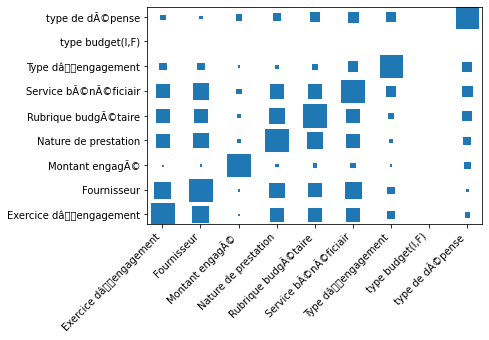

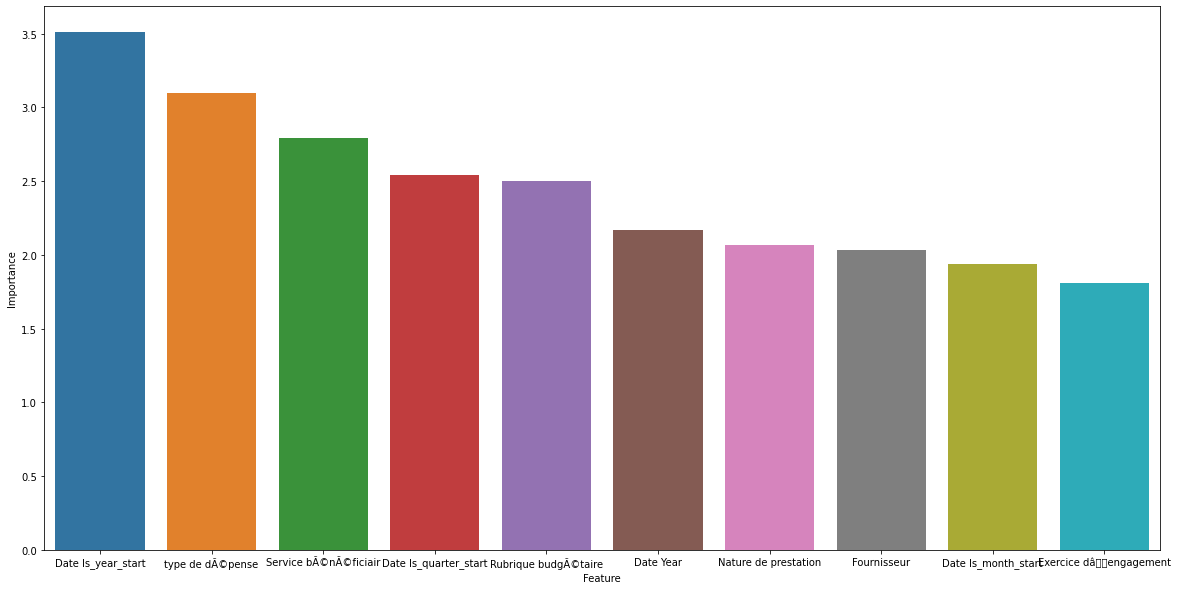


                    Feature  Importance
0        Date Is_year_start        3.51
1          type de dÃ©pense        3.10
2     Service bÃ©nÃ©ficiair        2.79
3     Date Is_quarter_start        2.54
4      Rubrique budgÃ©taire        2.50
5                 Date Year        2.17
6      Nature de prestation        2.07
7               Fournisseur        2.03
8       Date Is_month_start        1.94
9   Exercice dâengagement        1.81
10         Date Is_year_end        1.68
11      Date Is_quarter_end        1.54
12      Type dâengagement        1.38
13        Date Is_month_end        1.28
14               Date Month        1.21
15           Date Dayofyear        1.20
16                 Date Day        1.15
17           Date Dayofweek        1.08
18                Date Week        1.03
19         type budget(I,F)     -999.00
No numericals


In [48]:
X_reduced = submod4(sous_module_1, sous_module_2, sous_module_3, method='filter', drop_correlated=True)

In [663]:
X_reduced[2]

,Feature,Importance,Type
0,Date Is_year_start,3.51,Categorique
1,type de dÃ©pense,3.10,Categorique
2,Service bÃ©nÃ©ficiair,2.79,Categorique
3,Date Is_quarter_start,2.54,Categorique
4,Rubrique budgÃ©taire,2.43,Categorique
5,Date Year,2.17,Categorique
6,Nature de prestation,2.07,Categorique
7,Fournisseur,2.03,Categorique
8,Date Is_month_start,1.94,Categorique
9,Exercice dâengagement,1.81,Categorique


- Regression Metrics : 

mse = mean_squared_error(y_true, y_pred) <br>
mae = mean_absolute_error(y_true, y_pred)<br>
r_2 = r2_score(y_true, y_pred)<br>
metrics = [mse, mae, r_2]<br>

- Classification Metrics


y_pred_label = np.zeros(y_pred.shape) <br>
y_pred_label[np.arange(y_pred.shape[0]), y_pred.argmax(axis=1)] = 1<br>
        
with warnings.catch_warnings():<br>
---  warnings.simplefilter("ignore")<br>
---  logloss = log_loss(y_true, y_pred)<br>
---  acc = accuracy_score(y_true, y_pred_label)<br>
---  precision = precision_score(y_true, y_pred_label, average='micro')<br>
---  recall = recall_score(y_true, y_pred_label, average='micro')<br>
---  f1 = f1_score(y_true, y_pred_label, average='micro')<br>
            
metrics = [logloss, acc, precision, recall, f1]

- Binary Classification Metrics : 

y_pred_label = np.round(y_pred) <br>
        
with warnings.catch_warnings(): <br>
--- warnings.simplefilter("ignore") <br>
--- logloss = log_loss(y_true, y_pred) <br>
--- acc = accuracy_score(y_true, y_pred_label) <br>
--- precision = precision_score(y_true, y_pred_label, average='macro') <br>
--- recall = recall_score(y_true, y_pred_label, average='macro') <br>
--- f1 = f1_score(y_true, y_pred_label, average='macro') <br>
--- fpr, tpr, thresholds = roc_curve(y_true, y_pred) <br>
--- auc_score = auc(fpr, tpr) <br>

metrics = [logloss, acc, auc_ score, precision, recall, f1]

In [50]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import CategoricalNB

from sklearn.linear_model import LinearRegression, Lasso, LassoLars
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor



In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import roc_auc_score

In [106]:
def submod5(submod1, submod2, submod3, submod4) :
    
    task = submod1[6]
    
    
    
    X_train = submod3[0].copy()
    y_train = submod3[1].copy()
    y_train_norm = submod3[2].copy()
    X_test = submod3[3].copy()
    y_test = submod3[4].copy()
    y_test_norm = submod3[5].copy()
    #print(type(y_test))
    #print(y_test_norm.shape)
    #print(y_test.shape)
    #print(pd.DataFrame(y_test).shape)
    #Metric : 
    
    if task == 'Regression' : 
        metric = 'mse'
    else : 
        metric = 'accuracy' 
    
    classifiers = [LogisticRegression(), RidgeClassifier(), SVC() ,KNeighborsClassifier() , RandomForestClassifier()]
    regressors =[LinearRegression() , Lasso(), LassoLars(), SVR(), KNeighborsRegressor(), RandomForestRegressor()]
    
    
   
    
    def get_score(model, X, y, X_val, y_val, task=task):
            
            est = model
            if task == 'Regression' :
                
                est.fit(X, y)
                y_pred = est.predict(X_val)
                score = r2_score(y_val, y_pred)
                predictions = y_pred.reshape(X_val.shape[0],1)
                errors = abs(predictions - y_val)
                mape = 100 * np.mean(errors / y_val)
                accuracy = 100 - mape
            else :
                est.fit(X, y)
                y_pred = est.predict_proba(X_val)[:,1]
                score = roc_auc_score(y_val, y_pred)
                
            return score, accuracy, np.mean(errors)
    
    def evaluate_regression(model, test_features, test_la/y_valbels):
        
        predictions = model.predict(test_features)
        predictions = predictions.reshape(test_features.shape[0],1)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = 100 - mape
        #print('Model Performance')
        #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
        #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    
        #base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
        #base_model.fit(train_features, train_labels)
        #base_accuracy = evaluate_regression(base_model, test_features, test_labels)



        return accuracy, np.mean(errors)
    
    if task == 'Regression' : 
        
        score_per_model = []
        
        for estimator in regressors : 
            s_es = {}
            s_es['model_name'] = type(estimator).__name__
            s_es['score'] = get_score(estimator, X_train, y_train, X_test, y_test)
            s_es['score_norm'] = get_score(estimator, X_train, y_train_norm, X_test, y_test_norm)
            s_es['accuracy'], s_es['error'] = evaluate_regression(estimator, X_test, y_test_norm)
            score_per_model.append(s_es)
        
        print(score_per_model)    
    
    elif task == 'Classification' :
        
        score_per_model = {}
        
        for estimator in classifiers[:3] : 
            score_per_model['model_name'] = type(estimator).__name__
            score_per_model['score'] = get_score(estimator, X_train, y_train_norm, X_test, y_test_norm)
        
        print(score_per_model)     
            
            
        

In [107]:
submod5(sous_module_1, sous_module_2, sous_module_3, X_reduced)

[{'model_name': 'LinearRegression', 'score': -7.493724481739209e+19, 'score_norm': -7.493724481739245e+19, 'accuracy': 0   -1.315723e+13
dtype: float64, 'error': 0    1.557154e+07
dtype: float64}, {'model_name': 'Lasso', 'score': -5.282983833023516, 'score_norm': -1.3617163227452878e-05, 'accuracy': 0   -5021.588532
dtype: float64, 'error': 0    0.005777
dtype: float64}, {'model_name': 'LassoLars', 'score': -4.769485482871256, 'score_norm': -1.3617163227452878e-05, 'accuracy': 0   -5021.588532
dtype: float64, 'error': 0    0.005777
dtype: float64}, {'model_name': 'SVR', 'score': -0.05199265830462796, 'score_norm': -24.298033302127603, 'accuracy': 0   -113056.599618
dtype: float64, 'error': 0    0.083258
dtype: float64}, {'model_name': 'KNeighborsRegressor', 'score': -0.08994337714941403, 'score_norm': -0.08994337714941403, 'accuracy': 0   -1629.731383
dtype: float64, 'error': 0    0.005388
dtype: float64}, {'model_name': 'RandomForestRegressor', 'score': 0.16305198955300548, 'score_nor